## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

* Helper Functions

In [2]:
import math

def grayscale(img):
    # TODO
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    
def canny(img, low_threshold, high_threshold):
    # TODO
    return cv2.Canny(img, low_threshold, high_threshold)
    

def gaussian_blur(img, kernel_size):
    # TODO
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


def region_of_interest(img, vertices):
    # TODO
    mask = np.zeros(img.shape, img.dtype)
    cv2.fillPoly(mask, [vertices], 255)  

    return cv2.bitwise_and(img, mask)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    # TODO
    lines = cv2.HoughLinesP(img, rho, theta, threshold, 
                            minLineLength=min_line_len,
                            maxLineGap=max_line_gap)

    dst = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) 

    if lines is not None :
        for i in range(len(lines)) :
            line = lines[i][0]
            pt1 =line[0], line[1]
            pt2 = line[2], line[3]
            cv2.line(dst, pt1, pt2, (255,0,0) ,5, cv2.LINE_AA)
    return dst

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    # TODO
    return cv2.addWeighted(initial_img, β, img, α,γ )


In [3]:
def lane_finding(image):
    # Gray scale Image
    gray = grayscale(image)
    
    # Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    
    # Canny transform
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)
    
    # Select ROI
    vertices = np.array([[(50, image.shape[0]), 
                          (image.shape[1]/2 - 45, image.shape[0]/2 + 60), 
                          (image.shape[1]/2 + 45, image.shape[0]/2 + 60), 
                          (image.shape[1]-50, image.shape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 30
    min_line_len = 40 ##
    max_line_gap = 20##
    
    line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    # Draw the line on the original image
    result_image = weighted_img(line_image, image)
        
    return result_image

* Test on "test_image/*.jpg"

In [4]:
import os
os.listdir("./test_images")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

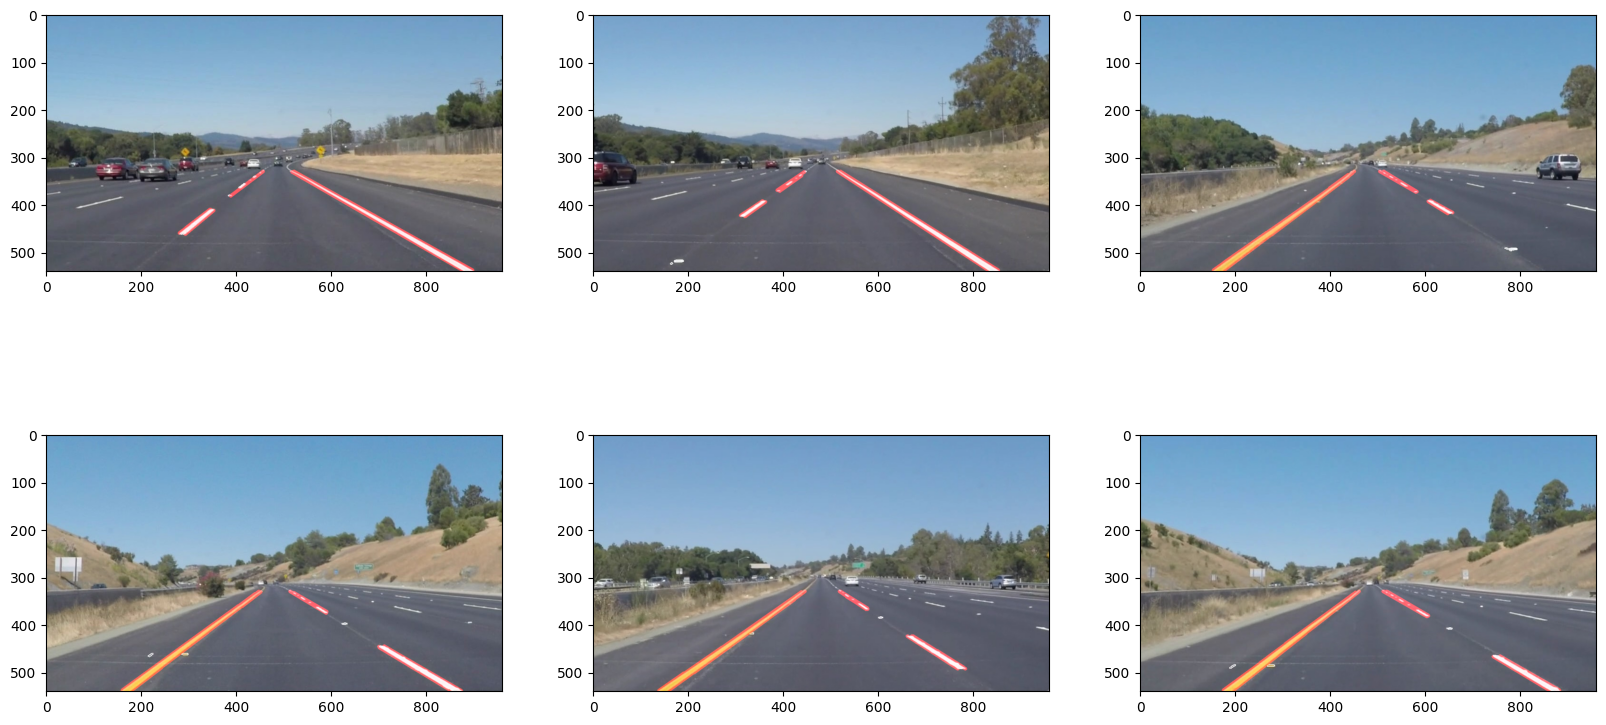

In [5]:
import glob

test_images = glob.glob("./test_images/*.jpg")
plt.figure(figsize=(20, 10))
for i, test_image in enumerate(test_images):
    image = mpimg.imread(test_image)
    result = lane_finding(image) 
    
    plt.subplot(2, 3, i+1)
    plt.imshow(result)

* Test on "test_videos/*.mp4"

In [6]:
import sys 
cap = cv2.VideoCapture('./test_videos/solidWhiteRight.mp4')

if not cap.isOpened() : 
    print('video open failed') 
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
delay = round(1000/fps) 

fourcc = cv2.VideoWriter_fourcc('D','I','V','X') 

outputvideo = cv2.VideoWriter('./out/solidwhiteright_output.mp4', fourcc, fps, (w,h))

while True : 
    ret ,frame = cap.read() 

    if not ret :
        print('frame read error')
        break

    # 차선인식
    frame = lane_finding(frame)

    # 재생 
    cv2.imshow('video', frame)

    # 저장
    outputvideo.write(frame)

    # 딜레이 
    key = cv2.waitKey(delay)
    if key ==27 :
        break 

# 종료 
if cap.isOpened() :
    print('cap release')
    cap.release()
    outputvideo.release()

cv2.destroyAllWindows()


frame read error
cap release
